<a href="https://colab.research.google.com/github/aasyngier/machine-learning/blob/main/ml_homework7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment: Understanding Binary Cross-Entropy in the Forward Stagewise Procedure
-----------------------------

## The Problem

In this assignment, you will demonstrate that adding a new constant predictor in the forward stagewise procedure to an already existing predictor from a previous stage, $f_{m-1}(x_i)$ (which we will denote as $f_i$ for ease of notation), may be for certain loss functions fundamentally more challenging than building a constant predictor from scratch. You will work with the binary cross-entropy loss defined as

$$
L(y, z) = -y \log(\sigma(z)) - (1 - y) \log(1 - \sigma(z)),
$$

where

- $y_i \in \{0,1\}$ are the binary labels,
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.

For the purposes of this assignment, assume that you are given:

- A dataset of binary labels $y_i$.
- **Two constants: $m$ (the number of ones) and $k$ (the number of zeros)** in the labels in the dataset.
- A set of predictions $f_i = f_{m-1}(x_i)$ obtained from a previous stage, where the $f_i$ values are generated randomly from a normal distribution.

### The assignment will explore two scenarios:

### Scenario A: Fitting a Constant Predictor from Scratch

In this scenario, you are building a predictor from scratch. The task is to find the optimal constant value $\lambda$ that minimizes the binary cross-entropy loss over the dataset. Formulate the optimization problem as:

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda).
$$



### Scenario B: Fitting the m-th Predictor in the Forward Stagewise Procedure

Now assume you already have an existing predictor $f_i = f_{m-1}(x_i)$. Rather than predicting from scratch, you wish to find an optimal additive correction $\lambda$ such that the updated prediction for each data point becomes

$$
 f_i + \lambda,
$$

and the corresponding binary cross-entropy loss is given by

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
$$


## Research Questions

In this assignment you will answer the following questions:

- Why is finding an optimal additive shift $\lambda$ in the forward stagewise procedure fundamentally harder than directly fitting a single-parameter predictor from scratch?
- How does the complexity of the loss landscape differ between these two scenarios? Discuss the differences in the shape and smoothness of the loss function in both cases.

## Tasks & Deliverables

1. **Derivation and Analysis**

  **Scenario A:**
  - Derive explicitly the optimal $\lambda$ for fitting from scratch, i.e., solve
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda)
    $$
    
    and express the answer in terms of $m$ and $k$.
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Interpretation:**
  Provide a clear interpretation of your derived optimal $\lambda$. What does this constant represent in terms of the dataset's label distribution?

  **Scenario B:**
  - Derive the implicit equation that $\lambda$ must satisfy in the additive shift scenario:
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
    $$
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Discussion:**
    Explain clearly why this implicit equation has no simple closed-form solution, unlike the previous case. What role does the non-linearity of the sigmoid function (in the binary cross-entropy loss) play in this difficulty?

2. **Loss Landscape Exploration (Python)**

  Write a Python code that:

  - Uses provided values for $n$, and for $k$ and $m$ (the number of zeros and ones in the labels, respectively), $k+m=n$.
  - Generates a set of predictions $f_i$ by sampling from a normal distribution.
  - Plots the binary cross-entropy loss as a function of $\lambda$ for:
    - Scenario A:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, \lambda) \text{ as a function of }\lambda
      $$
    - Scenario B:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, f_i + \lambda) \text{ as a function of }\lambda
      $$
  - **Discussion:**
  Is the loss landscape in Scenario A simpler or more complex than in Scenario B? Is it multimodal or unimodal? If so, is it thinkable the lambda minimizer in Scenario B can be found numerically? Where does the difficulty in Scenario B come from: the non-linearity of the problem or a complex loss landscape?

3. **Report**  
   - Summarize your theoretical insights and empirical findings in a **Colab notebook**.
   - Include the relevant proofs, code, discussion, and conclusions.
   - Place the notebook in your **GitHub repository** for this course, add a link to it in your README.md and add an **“Open in Colab”** badge in the notebook so it can be launched directly.



## Scenario A  

The per-observation loss is  

$$
L(y,\lambda)= -\,y\log\sigma(\lambda)\;-\;(1-y)\log\!\bigl(1-\sigma(\lambda)\bigr),
\qquad   
\sigma(\lambda)=\frac{1}{1+e^{-\lambda}} .
$$  

Because we predict the same score $\lambda$ for every example, the data-set
loss becomes  

$$
\mathcal{L}(\lambda)\;=\;\sum_{i=1}^{n}L(y_i,\lambda)
                     =-\,m\log\sigma(\lambda)-k\,\log\!\bigl(1-\sigma(\lambda)\bigr),
\tag{1}
$$  

where $m=\sum_i y_i$ (positives) and $k=n-m$ (negatives).

---

### 1&nbsp;&nbsp;Derivative  

For a single example:  We differentiate $L(y,\lambda)$ term-by-term:

$$
\frac{d}{d\lambda}L(y,\lambda)
   =-\,y\;\frac{\sigma'(\lambda)}{\sigma(\lambda)}
      + (1-y)\;\frac{\sigma'(\lambda)}{1-\sigma(\lambda)} .
$$  

Since $\sigma'(\lambda)=\sigma(\lambda)\bigl(1-\sigma(\lambda)\bigr)$, now we can insert this and simplify:

$$
\begin{aligned}
\frac{d}{d\lambda}L(y,\lambda)
   &=\sigma(\lambda)\bigl(1-\sigma(\lambda)\bigr)
     \left(-\frac{y}{\sigma(\lambda)}+\frac{1-y}{1-\sigma(\lambda)}\right) \\[4pt]
   &=-(1-\sigma(\lambda))\,y\;+\;\sigma(\lambda)\,(1-y) \\[4pt]
   &=\sigma(\lambda)-y .
\end{aligned}
$$  

So for every observation we have the following identity  

$$
\frac{d}{d\lambda}L(y_i,\lambda)=\sigma(\lambda)-y_i .
\tag{2}
$$  

---

For the whole data set:  Summing (2) over $i$ gives  

$$
\frac{d\mathcal{L}}{d\lambda}
   =\sum_{i=1}^{n}\bigl(\sigma(\lambda)-y_i\bigr)
   =n\,\sigma(\lambda)-m .
\tag{3}
$$  

---

### 2&nbsp;&nbsp;Setting the derivative to 0  

Now we set (3) to zero and obtain:

$$
n\,\sigma(\lambda^{*})-m=0
\quad\Longrightarrow\quad
\sigma(\lambda^{*})=\frac{m}{n}.
\tag{4}
$$  

---

### 3&nbsp;&nbsp;Closed-form optimum  

Next we invert the sigmoid with the logit transform:

$$
\lambda^{*}
   =\sigma^{-1}\!\left(\frac{m}{n}\right)
   =\log\frac{m/n}{1-m/n}
   =\log\frac{m}{k}.
\tag{5}
$$  

---

### 4&nbsp;&nbsp;Convexity (uniqueness)  

The second derivative of (3) is  

$$
\frac{d^{2}\mathcal{L}}{d\lambda^{2}}
   =n\,\sigma'(\lambda)
   =n\,\sigma(\lambda)\bigl(1-\sigma(\lambda)\bigr)\;>\;0 ,
$$  

so $\mathcal{L}(\lambda)$ is globally convex and thus the minimiser in (5) is
unique.

---

### Interpretation  

$$
\boxed{\;\lambda^{*}=\log\frac{m}{k}\;}
$$  

is simply the empirical log-odds of the positive class.  
Consequently  

$$
\hat{p}=\sigma(\lambda^{*})=\frac{m}{n}
$$  

recovers the observed class frequency when the model contains nothing but an
intercept.

## Scenario B  

After stage $m-1$ the model outputs a fixed vector $f_i=f_{m-1}(x_i)$.  
At stage $m$ we only adjust those scores by a constant $\lambda$:

$$
z_i = f_i+\lambda .
$$

The data-set loss therefore is  

$$
\mathcal{L}(\lambda)
   =\sum_{i=1}^{n} L\!\bigl(y_i,\,f_i+\lambda\bigr)
   =\sum_{i=1}^{n} \Bigl[-\,y_i\log\sigma(z_i)
                         -(1-y_i)\log\!\bigl(1-\sigma(z_i)\bigr)\Bigr].
\tag{6}
$$

---

### 1&nbsp;&nbsp;Derivative  

For a single observation we already showed in Scenario A that  

$$
\frac{d}{dz}L(y,z)=\sigma(z)-y. \tag{7}
$$  

Using $z=f_i+\lambda$ and $\dfrac{d}{d\lambda}(f_i+\lambda)=1$,

$$
\frac{d}{d\lambda}L\!\bigl(y_i,f_i+\lambda\bigr)
     =\sigma\!\bigl(f_i+\lambda\bigr)-y_i .
$$  

We now sum this over $i$ and get the gradient of the total loss:

$$
g(\lambda)\;=\;\frac{d\mathcal{L}}{d\lambda}
            =\sum_{i=1}^{n}\bigl[\sigma(f_i+\lambda)-y_i\bigr]
            =\sum_{i=1}^{n}\sigma(f_i+\lambda)\;-\;m .
\tag{8}
$$  

---

### 2&nbsp;&nbsp;Finding the optimal λ  

Setting the gradient to zero leads to  

$$
\sum_{i=1}^{n}\sigma(f_i+\lambda^{*}) \;=\; m .
\tag{9}
$$  

Equation (9) implicitly defines $\lambda^{*}$ but in contrast to what we saw in Scenario A, where every sigmoid sees the same argument $\lambda$, so you simply get $n\,\sigma(\lambda) = m$ and then apply the log-odds inverse: $\lambda = \log\frac{m}{k}\,$, this time every sigmoid term is shifted by a different $f_i$, so $\sigma(f_i + \lambda)$ cannot be pulled out or factored into a function of only $\lambda\,$. If $\sigma$ were linear, those shifts would add up neatly; because it is non-linear and saturating, each $f_i$ interacts with $\lambda$ in its own way, leaving us with an equation that has no elementary closed-form solution.

---

### 3&nbsp;&nbsp;Practical solution  

Because (9) lacks a closed-form answer, we solve it numerically. Given monotonicity and convexity, simple one-dimensional root-finding procedures (Newton, secant, bisection) converge rapidly.

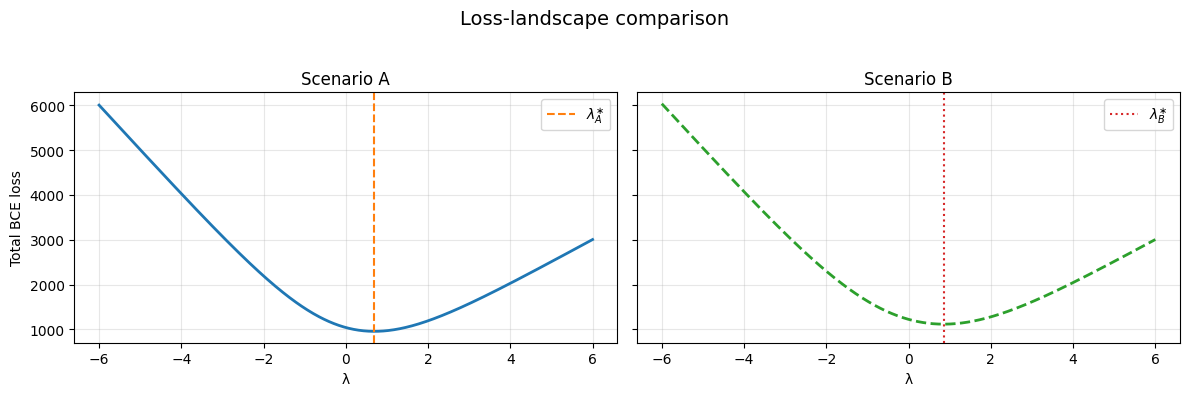

λ*_A (closed-form) = 0.693
λ*_B (numeric)     = 0.852


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

m, k = 1000, 500
n = m + k
y = np.r_[np.ones(m), np.zeros(k)]

rng = np.random.default_rng(seed=42)
f = rng.normal(0.0, 1.0, size=n)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def bce_loss(z, y):
    p = np.clip(sigmoid(z), 1e-10, 1-1e-10)
    return -(y*np.log(p) + (1-y)*np.log(1-p)).sum()

λ_grid = np.linspace(-6, 6, 600)
loss_A = [bce_loss(np.full(n, lam), y) for lam in λ_grid]
loss_B = [bce_loss(f + lam, y)        for lam in λ_grid]

# closed-form optimum for Scenario A
λ_A_opt = np.log(m / k)

# numeric optimum for Scenario B
λ_B_opt = minimize_scalar(lambda lam: bce_loss(f + lam, y),
                          bounds=(-6, 6), method='bounded').x


fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

ax[0].plot(λ_grid, loss_A, lw=2)
ax[0].axvline(λ_A_opt, ls='--', c='tab:orange',
              label=r'$\lambda_{A}^{\ast}$')
ax[0].set(title="Scenario A", xlabel='λ', ylabel='Total BCE loss')
ax[0].legend();  ax[0].grid(alpha=.3)

ax[1].plot(λ_grid, loss_B, lw=2, ls='--', c='tab:green')
ax[1].axvline(λ_B_opt, ls=':', c='tab:red',
              label=r'$\lambda_{B}^{\ast}$')
ax[1].set(title="Scenario B", xlabel='λ')
ax[1].legend();  ax[1].grid(alpha=.3)

fig.suptitle("Loss-landscape comparison", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print(f"λ*_A (closed-form) = {λ_A_opt:.3f}")
print(f"λ*_B (numeric)     = {λ_B_opt:.3f}")

### Discussion

Both loss curves are smooth and convex bowls, so each scenario has one unique global minimum

---

**Scenario A**

Because every data point receives the same constant score $\lambda$, the
first-order condition collapses to  $n\,\sigma(\lambda)=m,$ which gives the closed-form solution $\lambda_A^{*}=\log\frac{m}{k}.$

---

**Scenario B**

Now each term is shifted by a different base score $f_i$, so we must solve $
\sum_{i=1}^{n}\sigma\!\bigl(f_i+\lambda\bigr)=m.
$
The sigmoid’s non-linearity means $\lambda$ is entangled with the distinct
$f_i$ values, and no algebraic trick isolates it.  
However the curve remains convex and has just one minimum, so a
one-dimensional root-finder (we used SciPy’s bounded search) locates  
$
\lambda_B^{*}\approx\text{0.852}
$ in a few iterations.

---

**Core insight**

The extra difficulty in Scenario B is analytic, not geometric. The non-linear sigmoid applied to distinct shifts destroys the neat log-odds simplification from Scenario A, but it does not create multiple valleys or bumps. Once we accept numerical root-finding, the convex shape guarantees we can recover $\lambda_B^{*}$ quickly and reliably.
